<a href="https://colab.research.google.com/github/rsanch12/ECGR-4105-FALL_2025/blob/main/Homework%204/Problem%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv")
display(df.head())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate and train SVR model
svr_model = SVR(kernel='rbf', C=100, gamma='auto')
svr_model.fit(X_train, y_train)

SVR(C=100, gamma='auto')

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict the housing prices on the test set
y_pred = svr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the calculated MSE and R-squared score
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared score: {r2}')

Mean Squared Error (MSE): 5567443746833.106
R-squared score: -0.10146728118829507


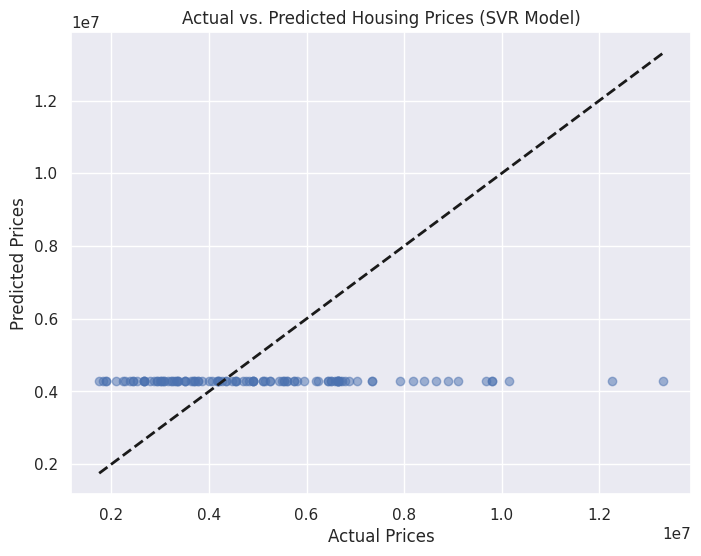

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices (SVR Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

url='https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
df = pd.read_csv(url)

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# Define features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'parking', 'prefarea_yes']
target = 'price'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a Ridge model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

Ridge()

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_ridge = ridge_model.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Mean Squared Error (MSE) for Ridge Regression: {mse_ridge}')

r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R-squared score for Ridge Regression: {r2_ridge}')

Mean Squared Error (MSE) for Ridge Regression: 1803434954035.0925
R-squared score for Ridge Regression: 0.6432070648669066


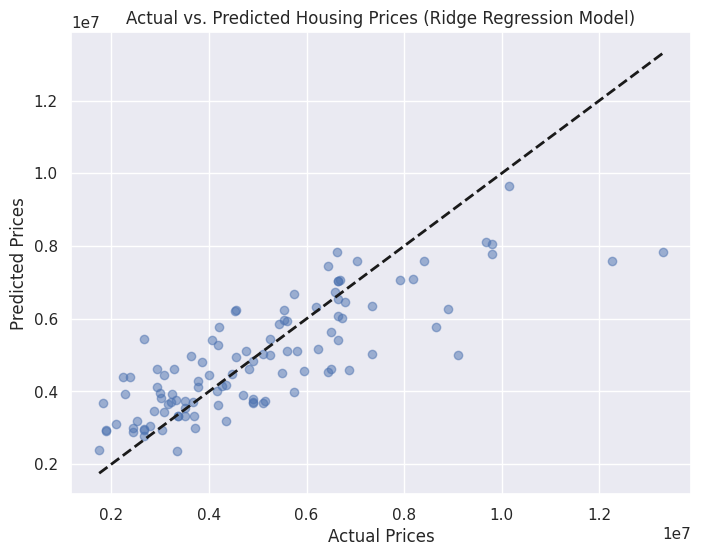

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices (Ridge Regression Model)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [10]:
from sklearn.svm import SVR

kernels = ['linear', 'poly', 'sigmoid']
svr_models = {}

for kernel in kernels:
    svr_model = SVR(kernel=kernel)
    svr_model.fit(X_train, y_train)
    svr_models[kernel] = svr_model

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

for kernel_name, svr_model in svr_models.items():
    y_pred_svr = svr_model.predict(X_test)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    r2_svr = r2_score(y_test, y_pred_svr)
    print(f'Kernel: {kernel_name}')
    print(f'Mean Squared Error (MSE): {mse_svr}')
    print(f'R-squared score: {r2_svr}')
    print('-' * 20)

Kernel: linear
Mean Squared Error (MSE): 3765398904229.474
R-squared score: 0.25505063324794264
--------------------
Kernel: poly
Mean Squared Error (MSE): 5567821806058.896
R-squared score: -0.10154207671142834
--------------------
Kernel: sigmoid
Mean Squared Error (MSE): 5568004961123.933
R-squared score: -0.10157831224800384
--------------------


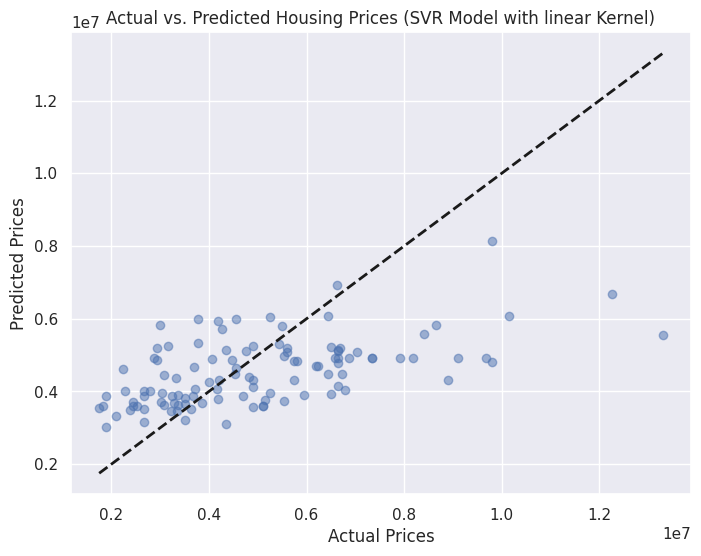

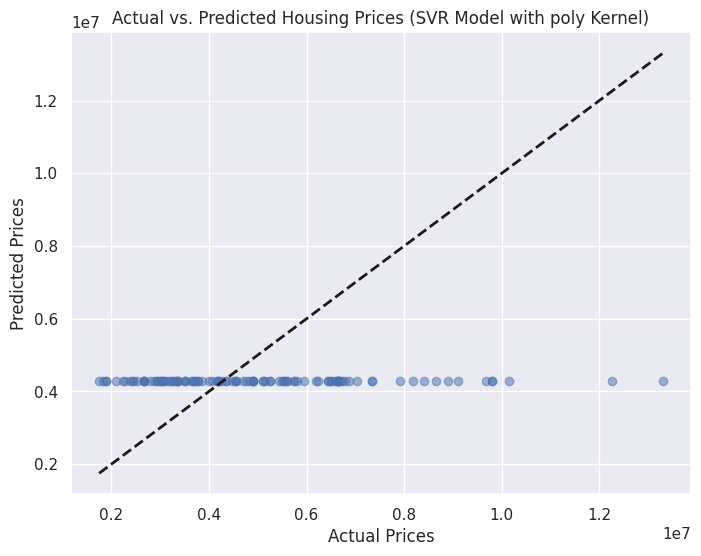

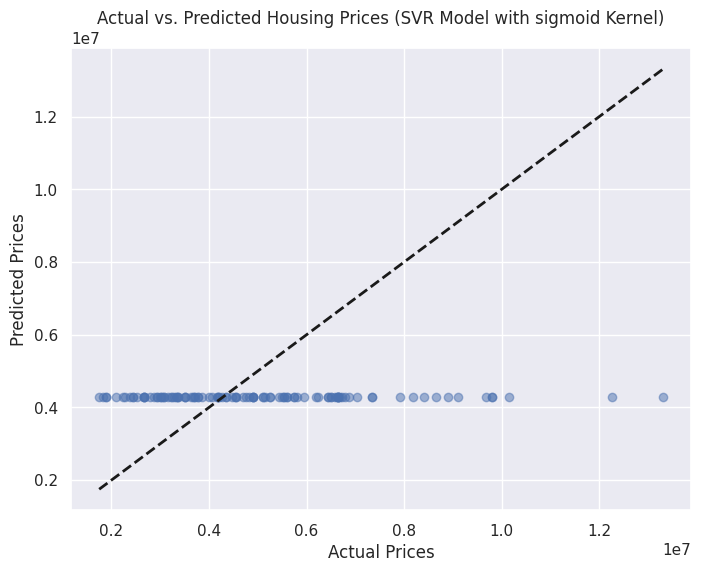

In [12]:
import matplotlib.pyplot as plt

for kernel_name, svr_model in svr_models.items():
    y_pred_svr = svr_model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_svr, alpha=0.5)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs. Predicted Housing Prices (SVR Model with {kernel_name} Kernel)')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

In [13]:
print("Performance Metrics:")
print("-" * 30)

# Ridge Regression metrics (recalled from previous steps)
print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R-squared: {r2_ridge}')
print("-" * 30)

# SVR metrics (recalled from previous steps)
for kernel_name, svr_model in svr_models.items():
    y_pred_svr = svr_model.predict(X_test)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    r2_svr = r2_score(y_test, y_pred_svr)
    print(f'SVR with {kernel_name} Kernel:')
    print(f'  Mean Squared Error (MSE): {mse_svr}')
    print(f'  R-squared score: {r2_svr}')
    print("-" * 30)

# Create a summary table (using pandas for better formatting)
summary_data = {
    'Model': ['Ridge Regression', 'SVR (Linear)', 'SVR (Poly)', 'SVR (Sigmoid)'],
    'MSE': [mse_ridge, mean_squared_error(y_test, svr_models['linear'].predict(X_test)),
            mean_squared_error(y_test, svr_models['poly'].predict(X_test)),
            mean_squared_error(y_test, svr_models['sigmoid'].predict(X_test))],
    'R-squared': [r2_ridge, r2_score(y_test, svr_models['linear'].predict(X_test)),
                  r2_score(y_test, svr_models['poly'].predict(X_test)),
                  r2_score(y_test, svr_models['sigmoid'].predict(X_test))]
}
summary_df = pd.DataFrame(summary_data)
print("\nModel Performance Summary:")
display(summary_df)

# Discuss the impact of different kernels on SVR performance
print("\nDiscussion on SVR Kernel Impact:")
print("The SVR models showed significant variation in performance based on the kernel function used.")
print(f"- The Linear kernel achieved an R-squared of {r2_score(y_test, svr_models['linear'].predict(X_test)):.3f}, indicating it captures some of the variance in the target variable.")
print(f"- The Polynomial and Sigmoid kernels resulted in negative R-squared scores ({r2_score(y_test, svr_models['poly'].predict(X_test)):.3f} and {r2_score(y_test, svr_models['sigmoid'].predict(X_test)):.3f} respectively).")
print("  A negative R-squared indicates that the model performs worse than simply predicting the mean of the target variable.")
print("This suggests that the linear relationships captured by the linear kernel are more suitable for this dataset compared to the non-linear relationships modeled by the polynomial and sigmoid kernels with their default hyperparameters.")
print("The Ridge Regression model performed the best with an R-squared of {:.3f}, significantly outperforming all the tested SVR models.".format(r2_ridge))

Performance Metrics:
------------------------------
Ridge Regression MSE: 1803434954035.0925
Ridge Regression R-squared: 0.6432070648669066
------------------------------
SVR with linear Kernel:
  Mean Squared Error (MSE): 3765398904229.474
  R-squared score: 0.25505063324794264
------------------------------
SVR with poly Kernel:
  Mean Squared Error (MSE): 5567821806058.896
  R-squared score: -0.10154207671142834
------------------------------
SVR with sigmoid Kernel:
  Mean Squared Error (MSE): 5568004961123.933
  R-squared score: -0.10157831224800384
------------------------------

Model Performance Summary:


,Model,MSE,R-squared
0,Ridge Regression,1.803435e+12,0.643207
1,SVR (Linear),3.765399e+12,0.255051
2,SVR (Poly),5.567822e+12,-0.101542
3,SVR (Sigmoid),5.568005e+12,-0.101578



Discussion on SVR Kernel Impact:
The SVR models showed significant variation in performance based on the kernel function used.
- The Linear kernel achieved an R-squared of 0.255, indicating it captures some of the variance in the target variable.
- The Polynomial and Sigmoid kernels resulted in negative R-squared scores (-0.102 and -0.102 respectively).
  A negative R-squared indicates that the model performs worse than simply predicting the mean of the target variable.
This suggests that the linear relationships captured by the linear kernel are more suitable for this dataset compared to the non-linear relationships modeled by the polynomial and sigmoid kernels with their default hyperparameters.
The Ridge Regression model performed the best with an R-squared of 0.643, significantly outperforming all the tested SVR models.
